
<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">EM Connectomics - Question 2</h1> 
<h2 align="center">Summer Workshop on the Dynamic Brain </h2> 
<h3 align="center">Monday, August 29, 2022</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


</div>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <p><b>Task 2:</b> This question looks at the mapping what fraction of synapses map to cells inhibitory or excitatory cells.
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 2.1:</b> Import the key modules and set parameters

</div>

In [7]:
# Import modules
# Import modules
from caveclient import CAVEclient
from nglui.statebuilder.helpers import make_neuron_neuroglancer_link, make_synapse_neuroglancer_link
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Initialize a client for the "minnie65_public_v343" datastack.
client = CAVEclient('minnie65_public_v343')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b> Task 2.2: </b> How many nuclei are there per root_id?
        </div>


In [2]:
client.materialize.get_tables()

['synapses_pni_2',
 'nucleus_neuron_svm',
 'nucleus_detection_v0',
 'functional_coreg',
 'allen_v1_column_types_slanted',
 'aibs_column_nonneuronal',
 'func_unit_em_match_release',
 'proofreading_status_public_release',
 'aibs_soma_nuc_metamodel_preds_v117']

In [3]:
# get all the nuclei that are neurons
nuc_df = client.materialize.query_table('nucleus_neuron_svm', 
                                        filter_equal_dict={'cell_type':'neuron'})

In [19]:
# Use pandas to make a table of how many times does a root id appears in the table.
# Since each row is a nucleus, this effectively counts the number of neuronal somata.
nuc_per_root=nuc_df.groupby('pt_root_id')['id'].count()
nuc_per_root.label='n_nuc'
nuc_per_root=pd.DataFrame({'n_nuc':nuc_per_root}).reset_index()

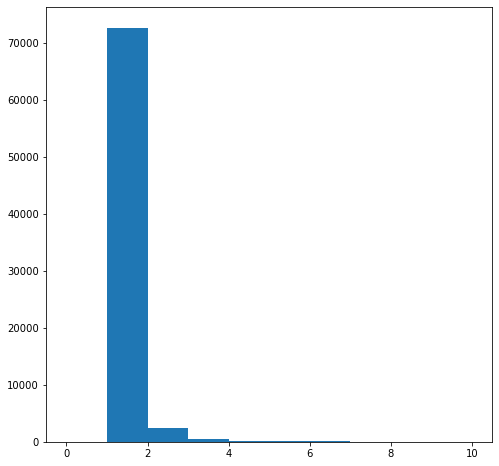

In [20]:
# make a histogram of the number of neuron nuclei per rootID
# use bins 0,1,2,3,4,5,6,7,8,9,10
f ,ax = plt.subplots(figsize=(8,8))
counts=ax.hist(nuc_per_root.n_nuc, bins=np.arange(0,11))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b> Task 2.3:</b> Pick a neuron with a clean or extended axon and get it's outputs
      </div>

In [15]:
clean_df = client.materialize.query_table('proofreading_status_public_release', 
                                       filter_in_dict={'status_axon':['clean', 'extended']})
ct_df=client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117')
dfm = pd.merge(clean_df, ct_df, on='pt_root_id', how='left')
dfm.query('cell_type=="BPC"')

,id_x,valid_x,pt_supervoxel_id_x,pt_root_id,valid_id,status_dendrite,status_axon,pt_position_x,id_y,valid_y,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id_y,pt_position_y,bb_start_position,bb_end_position
148,608,t,91272797422269509,864691135771828043,864691135771828043,extended,extended,"[192656, 94768, 20588]",75611.0,t,291125.0,aibs_neuronal,BPC,291125.0,t,313.522258,9.127280e+16,"[192656, 94768, 20588]","[nan, nan, nan]","[nan, nan, nan]"
151,611,t,89239800355525240,864691137197329985,864691137197329985,extended,extended,"[178176, 152192, 20167]",5969.0,t,260468.0,aibs_neuronal,BPC,260468.0,t,215.031480,8.923980e+16,"[178176, 152192, 20167]","[nan, nan, nan]","[nan, nan, nan]"
152,612,t,90783377375988057,864691136020729592,864691136020729592,extended,extended,"[189040, 118352, 21048]",85730.0,t,292675.0,aibs_neuronal,BPC,292675.0,t,165.072404,9.078338e+16,"[189040, 118352, 21048]","[nan, nan, nan]","[nan, nan, nan]"
153,613,t,90297805553356549,864691135945746212,864691135945746212,extended,extended,"[185584, 170240, 21046]",72556.0,t,298802.0,aibs_neuronal,BPC,298802.0,t,204.277023,9.029781e+16,"[185584, 170240, 21046]","[nan, nan, nan]","[nan, nan, nan]"
154,614,t,88468836747612860,864691135654475970,864691135654475970,extended,extended,"[172512, 175280, 21964]",85056.0,t,262898.0,aibs_neuronal,BPC,262898.0,t,230.092308,8.846884e+16,"[172512, 175280, 21964]","[nan, nan, nan]","[nan, nan, nan]"
155,615,t,87969795773021721,864691135809759436,864691135809759436,extended,extended,"[168512, 127088, 20650]",52492.0,t,256426.0,aibs_neuronal,BPC,256426.0,t,229.580964,8.796980e+16,"[168512, 127088, 20650]","[nan, nan, nan]","[nan, nan, nan]"
156,616,t,88607512718239945,864691136039723518,864691136039723518,extended,extended,"[173360, 159856, 22024]",3848.0,t,260718.0,aibs_neuronal,BPC,260718.0,t,206.650245,8.860751e+16,"[173360, 159856, 22024]","[nan, nan, nan]","[nan, nan, nan]"
162,617,t,88046624148372048,864691136008567724,864691136008567724,extended,extended,"[169488, 174880, 20977]",34890.0,t,262642.0,aibs_neuronal,BPC,262642.0,t,245.461647,8.804662e+16,"[169488, 174880, 20977]","[nan, nan, nan]","[nan, nan, nan]"
163,618,t,88953790094754156,864691135474915136,864691135474915136,extended,extended,"[176080, 118192, 21795]",24802.0,t,256543.0,aibs_neuronal,BPC,256543.0,t,205.709804,8.895379e+16,"[176080, 118192, 21795]","[nan, nan, nan]","[nan, nan, nan]"
166,621,t,90088280003517620,864691135502196317,864691135502196317,extended,extended,"[183920, 182432, 22462]",35072.0,t,301200.0,aibs_neuronal,BPC,301200.0,t,220.086272,9.008828e+16,"[183920, 182432, 22462]","[nan, nan, nan]","[nan, nan, nan]"


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    <p><b> Task 2.3: </b> Which of the synapses from this cell map to IDs which have just one neuron nucleus?
        </div>


In [23]:


# merge the synapse table with your table of root_ids and how many nuclei they have
# to gather information about how many nuclei are associated with the post-synaptic segment
# feel free to drop all the rows that don't have entries in the nucleus table for now
bipolar_cell = 864691136008567724
syn_df = client.materialize.synapse_query(pre_ids=bipolar_cell)
syn_dfm = pd.merge(syn_df, nuc_per_root, left_on='post_pt_root_id', right_on='pt_root_id', how='inner')
syn_dfm.head()


,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,pt_root_id,n_nuc
0,169411613,t,89952008945522952,864691136008567724,89952008945530947,864691135575425822,5600,"[183016, 215342, 19910]","[183016, 215362, 19915]","[183002, 215376, 19912]",864691135575425822,1
1,162590553,t,89037284258902966,864691136008567724,89037215539452843,864691135571546917,6640,"[176304, 215824, 21744]","[176404, 215730, 21742]","[176395, 215723, 21747]",864691135571546917,1
2,126035131,t,86502154042919308,864691136008567724,86502154042901072,864691135571546917,13320,"[157762, 202312, 22009]","[157796, 202306, 21994]","[157830, 202356, 22002]",864691135571546917,1
3,163305723,t,89109027459682071,864691136008567724,89109027459672258,864691135571546917,2196,"[176744, 226182, 22212]","[176758, 226166, 22206]","[176788, 226192, 22209]",864691135571546917,1
4,162773592,t,88966709356196527,864691136008567724,88966709356212688,864691135571546917,4328,"[176018, 214328, 21652]","[176030, 214286, 21669]","[176010, 214367, 21663]",864691135571546917,1


In [32]:
# use the cell type prediction table to get a list of predictions about cell types
syn_ct_dfm = pd.merge(syn_dfm.query('n_nuc==1'), ct_df, 
        left_on='post_pt_root_id', right_on='pt_root_id', how='left')
# for the single nucleus synapses, merge in the cell type predictions.
# use 'left'/'right' join to keep a row for every synapse

# check to make sure you only have 1 row per synapseID afterwards
syn_ct_dfm.id_x.value_counts().sort_values(ascending=False)

169411613    1
126125385    1
161095323    1
126035131    1
163305723    1
            ..
137838071    1
155975996    1
175747251    1
130382232    1
161586694    1
Name: id_x, Length: 180, dtype: int64

In [43]:
syn_ct_dfm.cell_type.value_counts().values

array([63, 52, 19, 12, 12,  8,  5,  5,  2,  1])

Text(0.5, 1.0, 'cell type target distribution of BPC 864691136008567724')

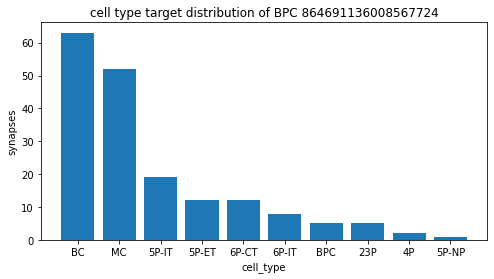

In [46]:
# Make a histogram of how this cell distributes it's synapses over cell types

f, ax = plt.subplots(figsize=(8,4))
cell_type_dist=syn_ct_dfm.cell_type.value_counts()
ax.bar(cell_type_dist.index, cell_type_dist)
ax.set_xlabel('cell_type')
ax.set_ylabel('synapses')
ax.set_title(f'cell type target distribution of BPC {bipolar_cell}')


In [60]:
# how many synapses do you not know what cell type is on the post-synaptic side?
n_nocell=syn_ct_dfm.cell_type.isna().value_counts()[True]
n_orphan = syn_df.shape[0]-syn_ct_dfm.shape[0]
print(f'no cell type: {n_nocell}')
print(f'orphan synapse: {n_orphan}')
print(f'total outputs: {syn_df.shape[0]}')
print(f'fraction unknown {(n_nocell+n_orphan)/syn_df.shape[0]}')

no cell type: 1
orphan synapse: 57
total outputs: 237
fraction unknown 0.24472573839662448
